In [7]:
import pylab as pl
import pykat
import numpy as np
% matplotlib inline
import matplotlib as plt

In [103]:
# Read in kat file

katfile = 'Tcavs_RFjitter.kat'

basekat = pykat.finesse.kat()
basekat.loadKatFile(katfile)


--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:50.413195

Finished in 0:00:00.550170
--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:51.009762

Finished in 0:00:00.061929
--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:51.126237

Finished in 0:00:00.127571
--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:51.307922

Finished in 0:00:00.096779
--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:51.502851

Finished in 0:00:00.218621


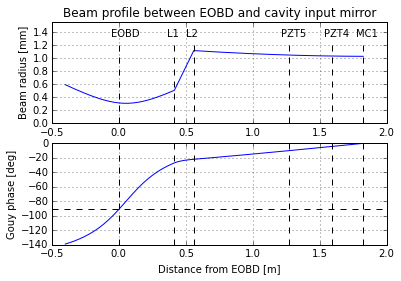

In [104]:
# plot beam size and Gouy phase over the distance between EOBD and L1

um=1e6
mm=1e3

sEOBDtoL1 = basekat.sEOBDtoL1.L.value
sL1toL2 = basekat.sL1toL2.L.value
sL2toPZT5 = basekat.sL2toPZT5.L.value
sPZT5toPZT4 = basekat.sPZT5toPZT4.L.value
sPZT4toMC1 = basekat.sPZT4toMC1.L.value

kat=basekat.deepcopy()
text=("""
bp wx_at_EOBD x w nEOBDout
bp wy_at_EOBD y w nEOBDout
gouy gouyx x sEOBDtoL1
gouy gouyy y sEOBDtoL1
xaxis sEOBDtoL1 l lin 0 %g 45""") % (sEOBDtoL1+0.4)
kat.parseCommands(text)
out1=kat.run()
out1_z = sEOBDtoL1-out1.x[::-1]
gouyxmax1=max(out1['gouyx'])

kat=basekat.deepcopy()
text=("""
bp wx_at_L1 x w nL1out
bp wy_at_L1 y w nL1out
gouy gouyx x sL1toL2
gouy gouyy y sL1toL2
xaxis sL1toL2 l lin 0 %g 15""") % sL1toL2
kat.parseCommands(text)

out2=kat.run()
out2_z = sL1toL2-out2.x[::-1] + max(out1_z)
gouyxmax2=max(out2['gouyx'])

kat=basekat.deepcopy()
text=("""
bp wx_at_L2 x w nL2out
bp wy_at_L2 y w nL2out
gouy gouyx x sL2toPZT5
gouy gouyy y sL2toPZT5
xaxis sL2toPZT5 l lin 0 %g 69""") % sL2toPZT5

kat.parseCommands(text)

out3=kat.run()
out3_z = sL2toPZT5-out3.x[::-1] + max(out2_z)
gouyxmax3=max(out3['gouyx'])

kat=basekat.deepcopy()
text=("""
bp wx_at_PZT5 x w nPZT5refl
bp wy_at_PZT5 y w nPZT5refl
gouy gouyx x sPZT5toPZT4
gouy gouyy y sPZT5toPZT4
xaxis sPZT5toPZT4 l lin 0 %g 32""") % sPZT5toPZT4

kat.parseCommands(text)
out4=kat.run()
out4_z = sPZT5toPZT4-out4.x[::-1] + max(out3_z)
gouyxmax4=max(out4['gouyx'])

kat=basekat.deepcopy()
text=("""
bp wx_at_MC1 x w nPZT4refl
bp wy_at_MC1 y w nPZT4refl
gouy gouyx x sPZT4toMC1
gouy gouyy y sPZT4toMC1
xaxis sPZT4toMC1 l lin 0 %g 24""") % sPZT4toMC1

kat.parseCommands(text)

kat.saveScript('check.kat')

out5=kat.run()
out5_z = sPZT4toMC1-out5.x[::-1] + max(out4_z)
gouyxmax5=max(out5['gouyx'])

out_z = np.hstack((out1_z,out2_z,out3_z,out4_z,out5_z))
out_wx = np.hstack((out1['wx_at_EOBD'][::-1],out2['wx_at_L1'][::-1],out3['wx_at_L2'][::-1],out4['wx_at_PZT5'][::-1],out5['wx_at_MC1'][::-1]))*mm

out_gouyx = -np.hstack((out1['gouyx'][::-1]+gouyxmax2+gouyxmax3+gouyxmax4+gouyxmax5,
                      out2['gouyx'][::-1]+gouyxmax3+gouyxmax4+gouyxmax5,
                      out3['gouyx'][::-1]+gouyxmax4+gouyxmax5,
                      out4['gouyx'][::-1]+gouyxmax5,
                      out5['gouyx'][::-1]))
label_h=max(out_wx)*1.2
label_hoff=-0.05

pl.figure()
pl.subplot(211)
pl.plot(out_z,out_wx, label='xaxis')
pl.ylabel('Beam radius [mm]')
pl.ylim((0,max(out_wx)*1.4))
pl.axvline(0,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='EOBD',xy=(0+label_hoff,label_h))
pl.axvline(sEOBDtoL1,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='L1',xy=(sEOBDtoL1+label_hoff,label_h))
pl.axvline(sEOBDtoL1+sL1toL2,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='L2',xy=(sEOBDtoL1+sL1toL2+label_hoff,label_h))
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='PZT5',xy=(sEOBDtoL1+sL1toL2+sL2toPZT5+label_hoff,label_h))
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='PZT4',xy=(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4+label_hoff,label_h))
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4+sPZT4toMC1,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='MC1',xy=(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4+sPZT4toMC1+label_hoff,label_h))
pl.grid()
pl.title('Beam profile between EOBD and cavity input mirror')

pl.subplot(212)
pl.plot(out_z,out_gouyx, label='xaxis')
pl.xlabel('Distance from EOBD [m]')
pl.ylabel('Gouy phase [deg]')
pl.axvline(0,linestyle='--',color='k')
pl.axvline(sEOBDtoL1,linestyle='--',color='k')
pl.axvline(sEOBDtoL1+sL1toL2,linestyle='--',color='k')
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5,linestyle='--',color='k')
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4,linestyle='--',color='k')
pl.axvline(sEOBDtoL1+sL1toL2+sL2toPZT5+sPZT5toPZT4+sPZT4toMC1,linestyle='--',color='k')
pl.axhline(-90,linestyle='--',color='k')
pl.grid()
pl.savefig('EOBDtoMC1profile.pdf')

--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:52.524616

Finished in 0:00:00.183150
--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:52.757482

Finished in 0:00:00.092038
--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:52.902945

Finished in 0:00:00.136999
--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:53.099009

Finished in 0:00:00.231401


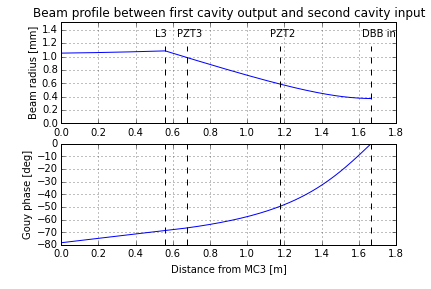

In [105]:
# plot beam size and Gouy phase over the distance between MC3 and DBB1

um=1e6
mm=1e3

sMCTRANStoDBBmmL = basekat.sMCTRANStoDBBmmL.L.value
sDBBmmLtoPZT3 = basekat.sDBBmmLtoPZT3.L.value
sPZT3toPZT2 = basekat.sPZT3toPZT2.L.value
sPZT2toDBB1 = basekat.sPZT2toDBB1.L.value

kat=basekat.deepcopy()
kat.TMC.enabled = False
text=("""
bp wx x w nMCTRANS
bp wy y w nMCTRANS
gouy gouyx x sMCTRANStoDBBmmL
gouy gouyy y sMCTRANStoDBBmmL
xaxis sMCTRANStoDBBmmL l lin 0 %g %g""") % (sMCTRANStoDBBmmL, round(sMCTRANStoDBBmmL*100))
kat.parseCommands(text)
out1=kat.run()
out1_z = sMCTRANStoDBBmmL-out1.x[::-1]
gouyxmax1=max(out1['gouyx'])

kat=basekat.deepcopy()
kat.TMC.enabled = False
text=("""
bp wx x w nDBBmmLout
bp wy y w nDBBmmLout
gouy gouyx x sDBBmmLtoPZT3
gouy gouyy y sDBBmmLtoPZT3
xaxis sDBBmmLtoPZT3 l lin 0 %g %g""") % (sDBBmmLtoPZT3, round(sDBBmmLtoPZT3*100))
kat.parseCommands(text)

out2=kat.run()
out2_z = sDBBmmLtoPZT3-out2.x[::-1] + max(out1_z)
gouyxmax2=max(out2['gouyx'])

kat=basekat.deepcopy()
kat.TMC.enabled = False
text=("""
bp wx x w nPZT3refl
bp wy y w nPZT3refl
gouy gouyx x sPZT3toPZT2
gouy gouyy y sPZT3toPZT2
xaxis sPZT3toPZT2 l lin 0 %g %g""") % (sPZT3toPZT2, round(sPZT3toPZT2*100))

kat.parseCommands(text)
kat.TMC.enabled = False
out3=kat.run()
out3_z = sPZT3toPZT2-out3.x[::-1] + max(out2_z)
gouyxmax3=max(out3['gouyx'])

kat=basekat.deepcopy()
kat.TMC.enabled = False
text=("""
bp wx x w nPZT2refl
bp wy y w nPZT2refl
gouy gouyx x sPZT2toDBB1
gouy gouyy y sPZT2toDBB1
xaxis sPZT2toDBB1 l lin 0 %g %g""") % (sPZT2toDBB1, round(sPZT2toDBB1*100))
kat.parseCommands(text)
out4=kat.run()
out4_z = sPZT2toDBB1-out4.x[::-1] + max(out3_z)
gouyxmax4=max(out4['gouyx'])

out_z = np.hstack((out1_z,out2_z,out3_z,out4_z))
out_wx = np.hstack((out1['wx'][::-1],out2['wx'][::-1],out3['wx'][::-1],out4['wx'][::-1]))*mm

out_gouyx = -np.hstack((out1['gouyx'][::-1]+gouyxmax2+gouyxmax3+gouyxmax4,
                      out2['gouyx'][::-1]+gouyxmax3+gouyxmax4,
                      out3['gouyx'][::-1]+gouyxmax4,
                      out4['gouyx'][::-1]))
label_h=max(out_wx)*1.2
label_hoff=-0.05

pl.figure()
pl.subplot(211)
pl.plot(out_z,out_wx, label='xaxis')
pl.ylabel('Beam radius [mm]')
pl.ylim((0,max(out_wx)*1.4))
pl.axvline(0,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='MC3',xy=(0+label_hoff,label_h))
pl.axvline(sMCTRANStoDBBmmL,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='L3',xy=(sMCTRANStoDBBmmL+label_hoff,label_h))
pl.axvline(sMCTRANStoDBBmmL+sDBBmmLtoPZT3,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='PZT3',xy=(sDBBmmLtoPZT3+sMCTRANStoDBBmmL+label_hoff,label_h))
pl.axvline(sMCTRANStoDBBmmL+sDBBmmLtoPZT3+sPZT3toPZT2,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='PZT2',xy=(sDBBmmLtoPZT3+sMCTRANStoDBBmmL+sPZT3toPZT2+label_hoff,label_h))
pl.axvline(sMCTRANStoDBBmmL+sDBBmmLtoPZT3+sPZT3toPZT2+sPZT2toDBB1,0,max(out_wx)*0.7,linestyle='--',color='k')
pl.annotate(s='DBB in',xy=(sDBBmmLtoPZT3+sMCTRANStoDBBmmL+sPZT3toPZT2+sPZT2toDBB1+label_hoff,label_h))
pl.grid()
pl.title('Beam profile between first cavity output and second cavity input')

pl.subplot(212)
pl.plot(out_z,out_gouyx, label='xaxis')
pl.xlabel('Distance from MC3 [m]')
pl.ylabel('Gouy phase [deg]')
pl.axvline(0,0,max(out_gouyx),linestyle='--',color='k')
pl.axvline(sMCTRANStoDBBmmL,linestyle='--',color='k')
pl.axvline(sMCTRANStoDBBmmL+sDBBmmLtoPZT3,linestyle='--',color='k')
pl.axvline(sMCTRANStoDBBmmL+sDBBmmLtoPZT3+sPZT3toPZT2,linestyle='--',color='k')
pl.axvline(sMCTRANStoDBBmmL+sDBBmmLtoPZT3+sPZT3toPZT2+sPZT2toDBB1,linestyle='--',color='k')
pl.grid()
pl.savefig('MC3toDBB1profile.pdf')

In [106]:
# Calculate some useful beam parameters for the first cavity

kat=basekat.deepcopy()
kat.parseCommands('bp w0atEOBD x w0 nEOBDout')
kat.noxaxis=True
out=kat.run()

print 'waist size at EOBD is '+str(out['w0atEOBD']*um)+'um'
print 'divergence angle at EOBD is '+str(1064e-9/pl.pi/out['w0atEOBD']*1000)+' mrad'

kat=basekat.deepcopy()
kat.parseCommands('bp w0cav x w0 nMC2in')
kat.noxaxis=True
out=kat.run()

print 'waist size at EOBD is '+str(out['w0cav']*um)+'um'
print 'divergence angle of cavity waist is '+str(1064e-9/pl.pi/out['w0cav']*1000)+' mrad'

--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:54.065441

Finished in 0:00:00.094383
waist size at EOBD is 303.741837938um
divergence angle at EOBD is 1.1150315057 mrad
--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:54.209005

Finished in 0:00:00.049723
waist size at EOBD is 1026.79684161um
divergence angle of cavity waist is 0.3298429691 mrad


In [107]:
# calculate PZT pitch tilt degree of freedom for the first cavity

sMC1toMC3 = basekat.sMC1toMC3.L.value
d_PZT5to_cavw0 = sPZT5toPZT4 + sPZT4toMC1 + 0.5*sMC1toMC3
d_PZT4to_cavw0 = sPZT4toMC1 + 0.5*sMC1toMC3
drive_ratio = d_PZT5to_cavw0/d_PZT4to_cavw0
print "PZT4 must be driven "+str(drive_ratio)+" times harder than PZT5 to get tilt only"


PZT4 must be driven 2.1149825784 times harder than PZT5 to get tilt only


--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:54.337282

Finished in 0:00:03.987650
HG01 mode is resonant at 14730000.0 Hz


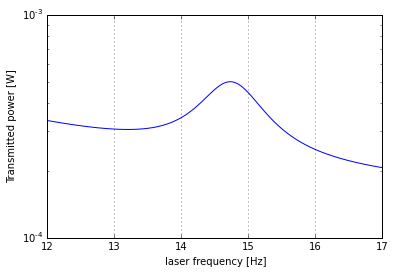

In [108]:
# Check resonance frequency of HG01 mode in the first cavity

MHz=1e-6

kat = basekat.deepcopy()

kat.parseCommands("""
attr PZT5 ybeta 10u
pd PDtrans nMCTRANS
xaxis laser f lin 12M 17M 5000""")

out=kat.run()

pl.figure()
pl.semilogy(out.x*MHz,out['PDtrans'])
pl.xlabel('laser frequency [Hz]')
pl.ylabel('Transmitted power [W]')
pl.grid()
xs=out.x
maxval=max(out['PDtrans'])
index_max=out['PDtrans'].argmax()
max_f=xs[index_max]
print "HG01 mode is resonant at "+str(max_f)+" Hz"
#checkvec=out['PDtrans']-maxval


In [109]:
# Check ratio of alignment error signal responses or two DOFs at 14730000 Hz jitter frequency
# by using fsig method

kat = basekat.deepcopy()

Iphase = 72.35

Qphase = Iphase - 90

# Drive translation by driving PZT5 and PZT4 with equal amplitudes but opposite phases

text=("""
fsig translation PZT5 ybeta $fdither 0 1
fsig translation PZT4 ybeta $fdither 180 1

pd2 ASCPDREFL_I $fjitter %g $fdither 0 nPDREFLin
pd2 ASCPDREFL_Q $fjitter %g $fdither 0 nPDREFLin
""") % (Iphase, Qphase)

kat.parseCommands(text)
kat.noxaxis=True
out=kat.run()

transI=out['ASCPDREFL_I']
transQ=out['ASCPDREFL_Q']

kat = basekat.deepcopy()

# Drive tilt by driving PZT5 and PZT4 with opposite phases and the pre-calculated amplitude ratio
text=("""
fsig tilt PZT5 ybeta $fdither 0 1
fsig tilt PZT4 ybeta $fdither 180 %g

pd2 ASCPDREFL_I $fjitter %g $fdither 0 nPDREFLin
pd2 ASCPDREFL_Q $fjitter %g $fdither 0 nPDREFLin
""") % (drive_ratio, Iphase, Qphase)

kat.parseCommands(text)
kat.noxaxis=True

out=kat.run()

tiltI=out['ASCPDREFL_I']
tiltQ=out['ASCPDREFL_Q']

# Print results for tilt and translation

print "\nI-phase response to translation = " +str(transI)+" W/rad on PZT5"
print "Q-phase response to translation = " +str(transQ)+" W/rad on PZT5"
print "I-phase response to tilt = " +str(tiltI)+" W/rad on PZT5"
print "Q-phase response to tilt = " +str(tiltQ)+" W/rad on PZT5"

print "\nRatio of [ tilt->Iphase : trans->Qphase ] =  "+str(tiltI/transQ)

--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:58.759057
** Warning: name 'translation' already used. This may cause confusion.

Finished in 0:00:00.205428
--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:59.011959
** Warning: name 'tilt' already used. This may cause confusion.

Finished in 0:00:00.115540

I-phase response to translation = -0.00273068801246 W/rad on PZT5
Q-phase response to translation = 0.0696597054883 W/rad on PZT5
I-phase response to tilt = 0.778151473951 W/rad on PZT5
Q-phase response to tilt = -0.000328168657219 W/rad on PZT5

Ratio of [ tilt->Iphase : trans->Qphase ] =  11.1707545775


Parsing `put PZT4 ybeta $mx1` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:59.233340

Finished in 0:00:00.179684
Parsing `put PZT4 ybeta $PZT4scale` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:08:59.471814

Finished in 0:00:00.187041

I-phase response to translation = -0.00273069595896 W/rad on PZT5
Q-phase response to translation = 0.0696597019807 W/rad on PZT5
I-phase response to tilt = 0.778120375575 W/rad on PZT5
Q-phase response to tilt = -0.000339727871455 W/rad on PZT5

Ratio of [ tilt->Iphase : trans->Qphase ] =  11.1703087072


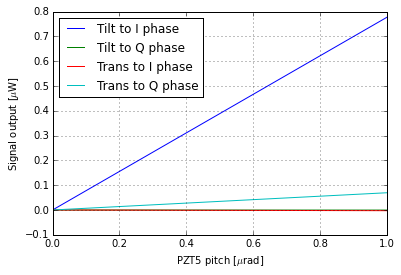

In [110]:
# Check ratio of alignment error signal responses for two DOFs at 14730000 Hz jitter frequency
# by using alignment sweep method, for the first cavity
uW=1e6
urad=1e6

kat = basekat.deepcopy()

text = ("""
pd1 ASCPDREFL_I $fjitter %g nPDREFLin
pd1 ASCPDREFL_Q $fjitter %g nPDREFLin

xaxis PZT5 ybeta lin 0 1u 100
put PZT4 ybeta $mx1

""") % (Iphase, Qphase)

kat.parseCommands(text)
out_trans = kat.run()

kat = basekat.deepcopy()

text = ("""
pd1 ASCPDREFL_I $fjitter %g nPDREFLin
pd1 ASCPDREFL_Q $fjitter %g nPDREFLin

xaxis PZT5 ybeta lin 0 1u 100
func PZT4scale = (-1) * $x1 * %g
put PZT4 ybeta $PZT4scale

""") % (Iphase, Qphase, drive_ratio)

kat.parseCommands(text)
out_tilt = kat.run()

pl.figure()
pl.plot(out_tilt.x*urad,out_tilt['ASCPDREFL_I']*uW,label='Tilt to I phase')
pl.plot(out_tilt.x*urad,out_tilt['ASCPDREFL_Q']*uW,label='Tilt to Q phase')
pl.plot(out_tilt.x*urad,out_trans['ASCPDREFL_I']*uW,label='Trans to I phase')
pl.plot(out_tilt.x*urad,out_trans['ASCPDREFL_Q']*uW,label='Trans to Q phase')
pl.legend(loc=0)
pl.xlabel('PZT5 pitch [$\mu$rad]')
pl.ylabel('Signal output [$\mu$W]')
pl.grid()

transI = out_trans['ASCPDREFL_I']
transQ = out_trans['ASCPDREFL_Q']
tiltI = out_tilt['ASCPDREFL_I']
tiltQ = out_tilt['ASCPDREFL_Q']
x=out_tilt.x

transIslope=(transI[len(transI)-1]-transI[0])/(x[len(x)-1]-x[0])
transQslope=(transQ[len(transQ)-1]-transQ[0])/(x[len(x)-1]-x[0])
tiltIslope=(tiltI[len(tiltI)-1]-tiltI[0])/(x[len(x)-1]-x[0])
tiltQslope=(tiltQ[len(tiltQ)-1]-tiltQ[0])/(x[len(x)-1]-x[0])


print "\nI-phase response to translation = " +str(transIslope)+" W/rad on PZT5"
print "Q-phase response to translation = " +str(transQslope)+" W/rad on PZT5"
print "I-phase response to tilt = " +str(tiltIslope)+" W/rad on PZT5"
print "Q-phase response to tilt = " +str(tiltQslope)+" W/rad on PZT5"


#print "Quadrature sum of responses = "+str(out['ASCPDREFL_I']+out['ASCPDREFL_Q'])
print "\nRatio of [ tilt->Iphase : trans->Qphase ] =  "+str(tiltIslope/transQslope)

Parsing `put PZT2 ybeta $mx1` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:09:00.185282
Saving data 100%

Finished in 0:00:00.152055
Parsing `put PZT2 ybeta $PZT2scale` into pykat object not implemented yet, added as extra line.
--------------------------------------------------------------
Running kat - Started at 2016-02-01 12:09:00.384624
Saving data 100%

Finished in 0:00:00.153438


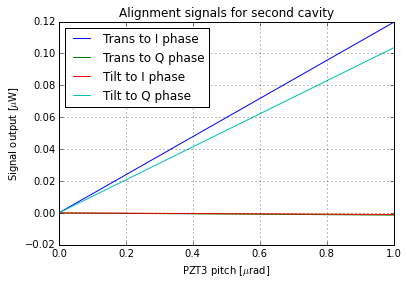

In [111]:
# Calculate alignment signals for second cavity using the sweep method

kat = basekat.deepcopy()

DBBIphase = -5
DBBQphase = DBBIphase-90

text = ("""
pd1 DBBASCPDREFL_I $fjitter %g nDBBREFLPDin
pd1 DBBASCPDREFL_Q $fjitter %g nDBBREFLPDin

xaxis PZT3 ybeta lin 0 1u 100
put PZT2 ybeta $mx1

""") % (DBBIphase, DBBQphase)

kat.parseCommands(text)

out_trans=kat.run(printerr=1)

kat = basekat.deepcopy()

PZT2scale = 2.02

text = ("""
pd1 DBBASCPDREFL_I $fjitter %g nDBBREFLPDin
pd1 DBBASCPDREFL_Q $fjitter %g nDBBREFLPDin

xaxis PZT3 ybeta lin 0 1u 100
func PZT2scale = (-1) * $x1 * %g
put PZT2 ybeta $PZT2scale
""") % (DBBIphase, DBBQphase, PZT2scale)

kat.parseCommands(text)

out_tilt=kat.run(printerr=1)

uW=1e6
urad=1e6

pl.figure()
pl.plot(out_trans.x*urad,out_trans['DBBASCPDREFL_I']*uW, label="Trans to I phase")
pl.plot(out_trans.x*urad,out_trans['DBBASCPDREFL_Q']*uW, label="Trans to Q phase")

pl.plot(out_tilt.x*urad,out_tilt['DBBASCPDREFL_I']*uW, label="Tilt to I phase")
pl.plot(out_tilt.x*urad,out_tilt['DBBASCPDREFL_Q']*uW, label="Tilt to Q phase")

pl.xlabel('PZT3 pitch [$\mu$rad]')
pl.ylabel('Signal output [$\mu$W]')
pl.grid()
pl.title('Alignment signals for second cavity')
pl.legend(loc=0)
pl.savefig('second_cav_ASC.pdf')


In [112]:
# some checks and small calcs

cavw0 = 1.027e-3
cavdiv = 1065e-9/(pl.pi*cavw0)

L1 = sPZT5toPZT4
L2 = d_PZT4to_cavw0

transy=pl.sqrt(2)*L1
transHG10 = transy/cavw0
print transy
print transHG10/1000
tilty=pl.sqrt(2)*(L1/L2)
tiltHG10 = tilty/cavdiv
print tilty
print cavdiv
print tiltHG10/1000

0.452548339959
0.440650769191
1.57682348418
0.000330087661914
4.77698401399
